In [1]:
import bc_gh
import mod
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [40]:
R_APSK

array([[0.76213299, 1.36702388, 1.83636626, 2.27558285, 2.72765598,
        3.23548409, 3.88146724, 4.99532767]])

[[0.76213299 1.06457844 1.29924962 1.51885792 1.74489449 1.99880854
  2.32180012 2.87873033]]
R1= 1.1169759035110474


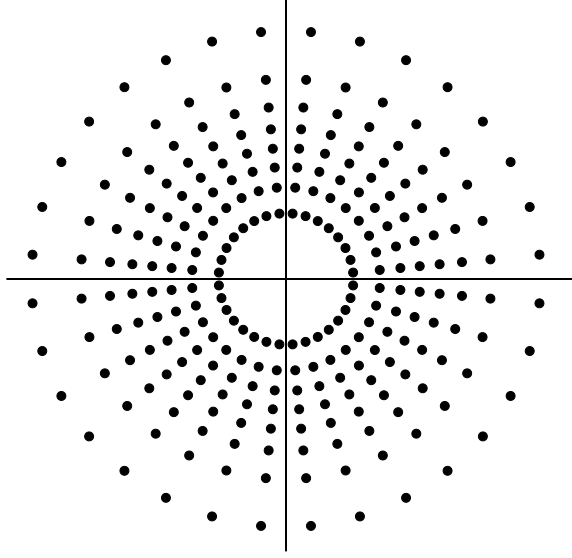

In [46]:
M_APSK = np.array([32]*8)

M_APSK = M_APSK.squeeze()

M = np.sum(M_APSK) # 调制阶数
K = int(np.log2(M))

ring_num = M_APSK.size # APSK环数
m2 = int(np.log2(ring_num))

# 参见参考文献中 Fig.1
theta0 = np.pi/M_APSK[0]
delta_theta = 2*theta0

# R_APSK = mod.getAPSKRadius(m2)*3
R_APSK = np.array([[0.76213299, 1.36702388, 1.83636626, 2.27558285, 2.72765598,
        3.23548409, 3.88146724, 4.99532767]])
diff = R_APSK-R_APSK[0, 0]
R_APSK = R_APSK[0, 0]+diff*0.5
print(R_APSK)
thetas = np.arange(theta0, 2*np.pi, delta_theta)

thetas = thetas.reshape((len(thetas), 1))

symbols = R_APSK*np.exp(1j*thetas)
labels = mod.grayCoded(ring_num)+ring_num*mod.grayCoded(int(M_APSK[0])).T

symbols = symbols.reshape((M, 1))
labels = labels.reshape((M, 1))

symbols = mod.normalizeConste(symbols)

SNR_dB = 5
SNR_lin = 10**(.1*SNR_dB)

bc1 = bc_gh.awgn(symbols*np.sqrt(SNR_lin), labels, 2)
R1 = bc1.sum()
print("R1=", R1)
# print(bc1)
mod.showConsteDiagram(symbols, labels, False)

In [3]:
# symbols1, labels1 = mod.grayAPSK(np.array([32]*8))
# symbols2, labels2 = mod.grayQAM(256)

In [4]:
M = symbols.size
K = int(np.log2(M))
M1 = 4
M2 = 64
K1 = 2
K2 = 6

SNR1_dB = 5
SNR2_dB = 15

SNR1 = 10**(.1*SNR1_dB)
SNR2 = 10**(.1*SNR2_dB)

In [5]:
bc1 = bc_gh.awgn(symbols*np.sqrt(SNR1), labels, K1)
R1 = bc1.sum()

In [6]:
bc2 = bc_gh.awgn(symbols*np.sqrt(SNR2), labels, -K2)
R2 = bc2.sum()

In [7]:
print("R1=", R1)
print("R2=", R2)

R1= 1.0182779431343079
R2= 3.146583318710327


In [47]:
SNR_dB = np.arange(0, 30, 1)
SNR_lin = 10**(.1*SNR_dB)

symbols1, labels1 = mod.grayAPSK(np.array([32]*8))
symbols2, labels2 = mod.grayQAM(256)

bc1 = np.zeros((SNR_lin.size, 8))
bc2 = np.zeros((SNR_lin.size, 8))

for i in tqdm(range(SNR_lin.size)):
    bc1[i, :] = bc_gh.awgn(symbols1*np.sqrt(SNR_lin[i]), labels1)
    bc2[i, :] = bc_gh.awgn(symbols2*np.sqrt(SNR_lin[i]), labels2)

100%|██████████| 30/30 [00:05<00:00,  5.60it/s]


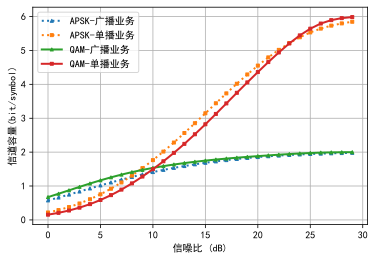

In [48]:
fig = plt.figure()
plt.grid()
K1 = 2
K2 = 6
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

plt.plot(SNR_dB, bc1[:, 0:K1].sum(axis=1), linewidth=2.0, marker='^', markersize=3, linestyle=':')
plt.plot(SNR_dB, bc1[:, K1:].sum(axis=1), linewidth=2.0, marker='s', markersize=3, linestyle=':')
plt.plot(SNR_dB, bc2[:, 0:K1].sum(axis=1), linewidth=2.0, marker='^', markersize=3)
plt.plot(SNR_dB, bc2[:, K1:].sum(axis=1), linewidth=2.0, marker='s', markersize=3)

plt.xlabel("信噪比 (dB)")
plt.ylabel("信道容量(bit/symbol)")

plt.legend(["APSK-广播业务", "APSK-单播业务", "QAM-广播业务", "QAM-单播业务"])